In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle # For rectangles
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats # For linregress (trends)
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.8.2 | packaged by conda-forge | (default, Feb 28 2020, 17:15:22) 
[GCC 7.3.0]
Virtual memory usage - total: 252 GB / available: 199 GB / percent used: 20.7 %


# Check model data

In [2]:
path = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-02'
path_guided = '/ccc/store/cont003/thredds/mellull/LMDZOR/PROD/amip/CM6012-LR-amip-G-02'

folder = 'ATM'
var_LMDZ = 'temp'
# var_LMDZ = 'temp'

In [3]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')

<xarray.Dataset>
Dimensions:               (axis_nbounds: 2, lat: 143, lon: 144, presnivs: 79, time_counter: 192)
Coordinates:
  * lat                   (lat) float32 90.0 88.73239 ... -88.73239 -90.0
  * lon                   (lon) float32 -180.0 -177.5 -175.0 ... 175.0 177.5
  * presnivs              (presnivs) float32 101202.11 100942.43 ... 1.4834349
  * time_counter          (time_counter) object 1999-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_centered         (time_counter) object ...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_centered_bounds  (time_counter, axis_nbounds) object ...
    aire                  (lat, lon) float32 ...
    temp                  (time_counter, presnivs, lat, lon) float32 ...
Attributes:
    name:                      histmth
    description:               Created by xios
    title:                     Created by xios
    Conventions:               CF-1.6
    timeStamp:                 2017-Oct-31 15:18:38 GMT
    uuid:                      edd88a50-9cee-4920-b578-60394b07505d
    LongName:                  LMDZOR configuration
    history:                   Wed Nov  1 16:38:41 2017: ncrcat -C --buffer_s...
    nco_openmp_thread_number:  1

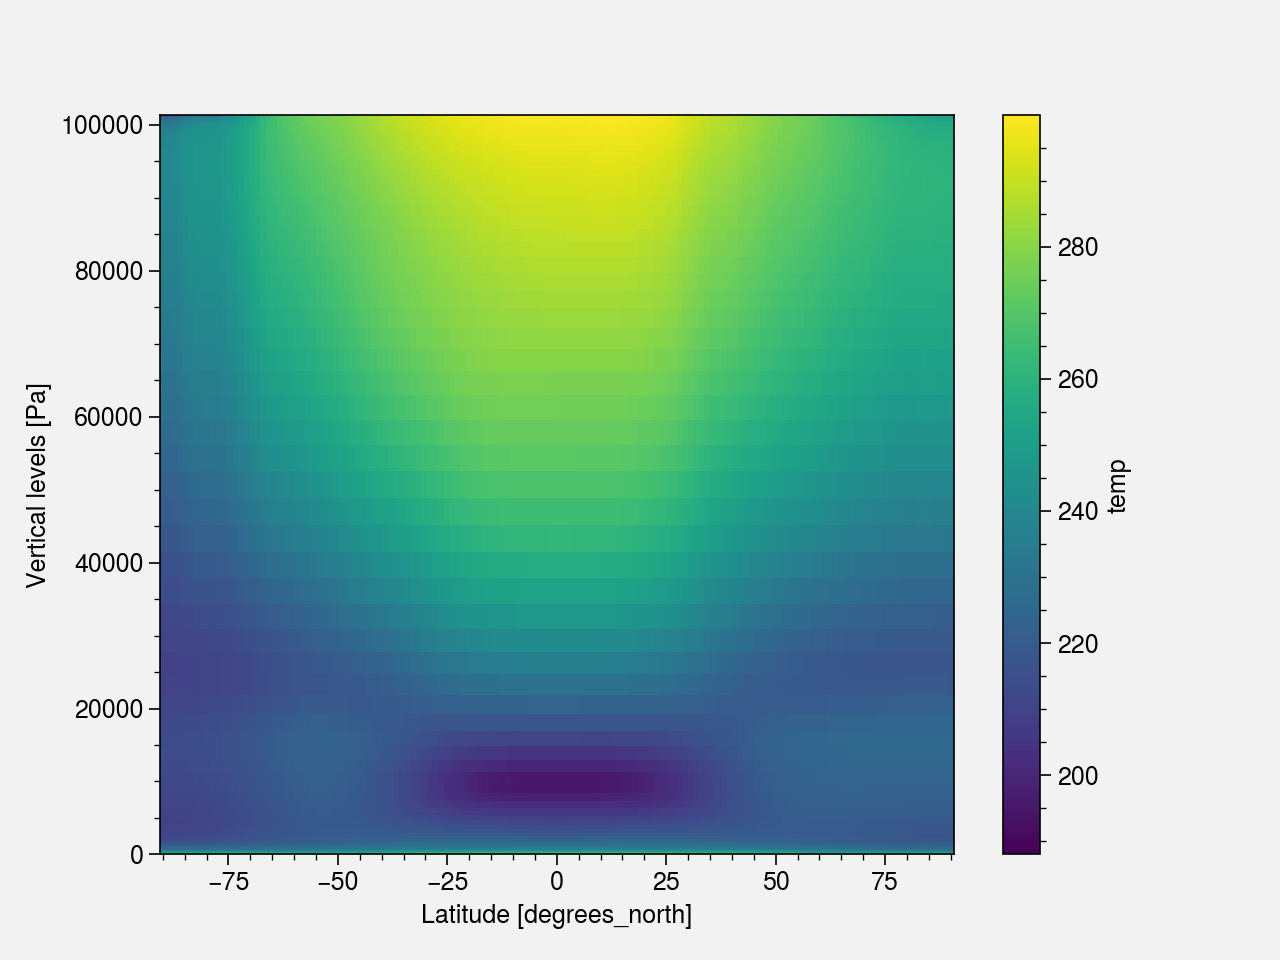

In [4]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

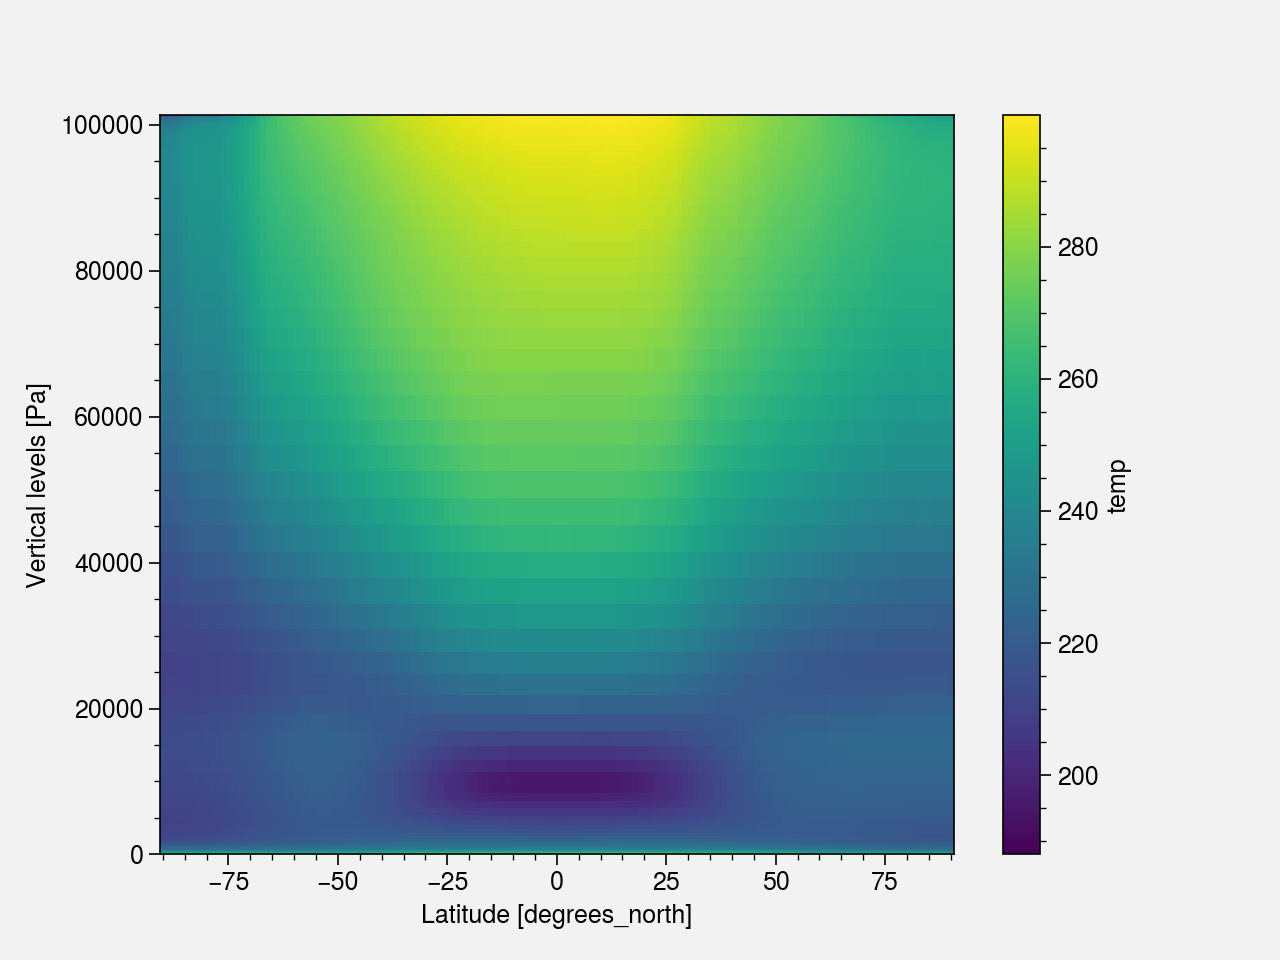

In [5]:
xr.open_dataset(path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc')[var_LMDZ].mean('time_counter').mean('lon').plot()

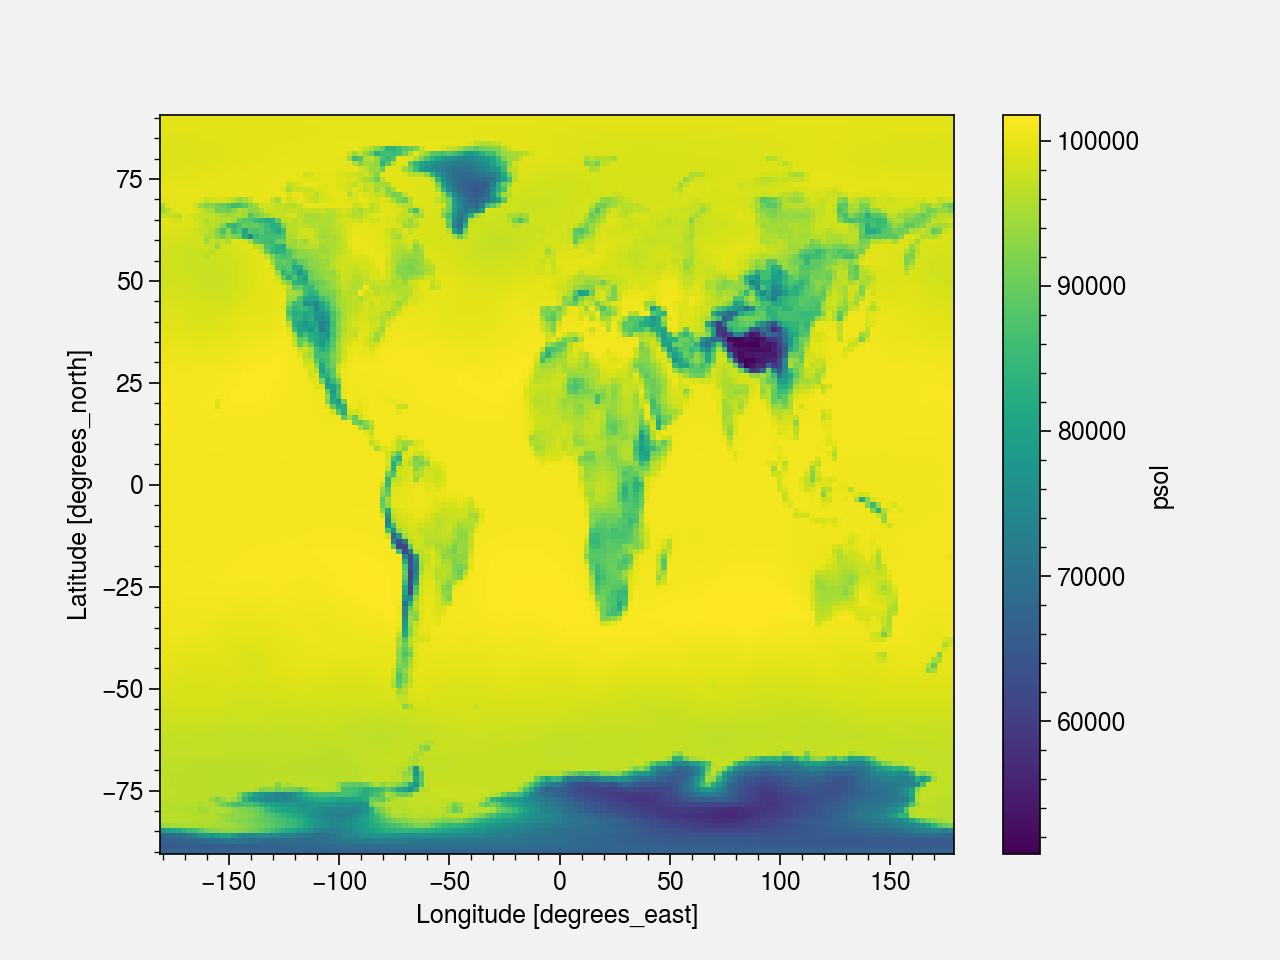

In [6]:
xr.open_dataset(path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc')['psol'].min('time_counter').plot()

# Define period and zone

In [26]:
# Define common period
period = slice('1999','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

var = 'temp'
label = 'Air Temperature'
units = '°C'
cmap='CoolWarm'
levels=plot.arange(-7,7,1)

# Get model data guided and not guided

In [8]:
model_guided = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model_guided = model_guided.rename({'time_counter': 'time'}) - 273.15
model_guided.attrs['units'] = '°C'
model_guided

<xarray.DataArray 'temp' (time: 192, presnivs: 79, lat: 143, lon: 144)>
array([[[[-40.448105, -40.448105, -40.448105, ..., -40.448105,
          -40.448105, -40.448105],
         [-39.052933, -39.20189 , -39.140915, ..., -38.994812,
          -38.98355 , -39.041153],
         [-40.52475 , -41.009567, -40.14067 , ..., -40.45659 ,
          -39.297928, -40.490448],
         ...,
         [-25.714127, -25.580109, -25.29486 , ..., -26.332413,
          -26.071823, -26.078613],
         [-27.596893, -27.446396, -27.390732, ..., -27.644531,
          -27.748856, -27.559952],
         [-27.455063, -27.455063, -27.455063, ..., -27.455063,
          -27.455063, -27.455063]],

        [[-36.50351 , -36.50351 , -36.50351 , ..., -36.50351 ,
          -36.50351 , -36.50351 ],
         [-36.399628, -36.512817, -36.51068 , ..., -36.277008,
          -36.296158, -36.36148 ],
         [-37.349823, -37.45334 , -37.41664 , ..., -37.088852,
          -36.946823, -37.23094 ],
         ...,
         [-25.739975, -25.466766, -25.245575, ..., -26.003418,
          -26.110931, -25.910187],
         [-27.12593 , -27.008423, -27.055573, ..., -27.301956,
          -27.12117 , -27.162567],
         [-26.204834, -26.204834, -26.204834, ..., -26.204834,
          -26.204834, -26.204834]],

        [[-35.094147, -35.094147, -35.094147, ..., -35.094147,
          -35.094147, -35.094147],
         [-35.26169 , -35.359634, -35.3647  , ..., -35.133118,
          -35.182404, -35.223022],
         [-36.15602 , -36.11844 , -36.26187 , ..., -35.787827,
          -35.880997, -35.91829 ],
         ...,
         [-25.604889, -25.28061 , -25.097229, ..., -25.61467 ,
          -25.944366, -25.577606],
         [-26.327118, -26.468185, -26.266983, ..., -26.798096,
          -26.45723 , -26.656036],
         [-25.675507, -25.675507, -25.675507, ..., -25.675507,
          -25.675507, -25.675507]],

        ...,

        [[-43.804443, -43.804443, -43.804443, ..., -43.804443,
          -43.804443, -43.804443],
         [-43.742157, -43.74289 , -43.74269 , ..., -43.74028 ,
          -43.7415  , -43.741898],
         [-43.88295 , -43.883804, -43.884094, ..., -43.877777,
          -43.880554, -43.882202],
         ...,
         [-49.25853 , -49.257812, -49.257217, ..., -49.259613,
          -49.260834, -49.2601  ],
         [-49.258118, -49.2585  , -49.258347, ..., -49.25624 ,
          -49.257797, -49.25818 ],
         [-49.269943, -49.269943, -49.269943, ..., -49.269943,
          -49.269943, -49.269943]],

        [[-54.025146, -54.025146, -54.025146, ..., -54.025146,
          -54.025146, -54.025146],
         [-53.86641 , -53.86612 , -53.866013, ..., -53.867813,
          -53.868027, -53.86743 ],
         [-53.950943, -53.9496  , -53.94803 , ..., -53.95311 ,
          -53.95259 , -53.952255],
         ...,
         [-72.641174, -72.639725, -72.63777 , ..., -72.64212 ,
          -72.64159 , -72.64157 ],
         [-72.64972 , -72.64961 , -72.6492  , ..., -72.64783 ,
          -72.648285, -72.64908 ],
         [-72.66547 , -72.66547 , -72.66547 , ..., -72.66547 ,
          -72.66547 , -72.66547 ]],

        [[-78.91876 , -78.91876 , -78.91876 , ..., -78.91876 ,
          -78.91876 , -78.91876 ],
         [-78.84935 , -78.84909 , -78.849014, ..., -78.850204,
          -78.85007 , -78.84984 ],
         [-78.85954 , -78.859116, -78.858734, ..., -78.859604,
          -78.8595  , -78.85977 ],
         ...,
         [-92.11951 , -92.118805, -92.11772 , ..., -92.12053 ,
          -92.11977 , -92.11957 ],
         [-92.12297 , -92.12285 , -92.12285 , ..., -92.12233 ,
          -92.12222 , -92.12242 ],
         [-92.125824, -92.125824, -92.125824, ..., -92.125824,
          -92.125824, -92.125824]]],


       [[[-46.067963, -46.067963, -46.067963, ..., -46.067963,
          -46.067963, -46.067963],
         [-44.47043 , -44.346222, -44.566147, ..., -44.778564,
          -44.511353, -44.436584],
         [-43.941605, -44.965393, -43.794586, ..., -44.140656,
          -44.186523, -44.528

In [9]:
model = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_'+var_LMDZ+'.nc'
)[var_LMDZ].sel(time_counter=period)
model = model.rename({'time_counter': 'time'}) - 273.15
model.attrs['units'] = '°C'
model

<xarray.DataArray 'temp' (time: 192, presnivs: 79, lat: 143, lon: 144)>
array([[[[ -31.07846 ,  -31.07846 ,  -31.07846 , ...,  -31.07846 ,
           -31.07846 ,  -31.07846 ],
         [ -30.015747,  -30.036896,  -30.046661, ...,  -30.016357,
           -29.930252,  -30.065338],
         [ -33.60884 ,  -34.277176,  -33.1588  , ...,  -33.59204 ,
           -33.282227,  -34.06903 ],
         ...,
         [ -28.003372,  -27.694351,  -27.350372, ...,  -28.383408,
           -28.296448,  -28.270126],
         [ -29.93953 ,  -29.662033,  -29.761658, ...,  -29.95549 ,
           -30.034515,  -29.815506],
         [ -29.322845,  -29.322845,  -29.322845, ...,  -29.322845,
           -29.322845,  -29.322845]],

        [[ -27.917282,  -27.917282,  -27.917282, ...,  -27.917282,
           -27.917282,  -27.917282],
         [ -29.427856,  -29.197052,  -29.468124, ...,  -29.214218,
           -29.317001,  -29.226929],
         [ -31.512802,  -31.605316,  -31.501648, ...,  -31.472061,
           -31.164703,  -31.411514],
         ...,
         [ -27.64537 ,  -27.365692,  -27.169708, ...,  -27.932846,
           -27.904205,  -27.83957 ],
         [ -29.246796,  -29.209183,  -29.092667, ...,  -29.428757,
           -29.389496,  -29.341782],
         [ -28.826477,  -28.826477,  -28.826477, ...,  -28.826477,
           -28.826477,  -28.826477]],

        [[ -27.08319 ,  -27.08319 ,  -27.08319 , ...,  -27.08319 ,
           -27.08319 ,  -27.08319 ],
         [ -28.829163,  -28.584244,  -28.848877, ...,  -28.62584 ,
           -28.716263,  -28.647903],
         [ -30.609009,  -30.486923,  -30.739761, ...,  -30.455154,
           -30.252472,  -30.428925],
         ...,
         [ -27.41983 ,  -27.160934,  -26.896973, ...,  -27.737091,
           -27.676056,  -27.612366],
         [ -28.804169,  -28.816177,  -28.686539, ...,  -29.033752,
           -28.968094,  -28.94522 ],
         [ -28.479202,  -28.479202,  -28.479202, ...,  -28.479202,
           -28.479202,  -28.479202]],

        ...,

        [[ -36.494385,  -36.494385,  -36.494385, ...,  -36.494385,
           -36.494385,  -36.494385],
         [ -36.496582,  -36.488953,  -36.48239 , ...,  -36.518982,
           -36.51097 ,  -36.503494],
         [ -36.521484,  -36.50563 ,  -36.489517, ...,  -36.56688 ,
           -36.552353,  -36.537277],
         ...,
         [ -45.126175,  -45.125366,  -45.12465 , ...,  -45.128098,
           -45.127884,  -45.12703 ],
         [ -45.086807,  -45.08731 ,  -45.08734 , ...,  -45.08658 ,
           -45.087036,  -45.08647 ],
         [ -45.089783,  -45.089783,  -45.089783, ...,  -45.089783,
           -45.089783,  -45.089783]],

        [[ -43.422424,  -43.422424,  -43.422424, ...,  -43.422424,
           -43.422424,  -43.422424],
         [ -43.391342,  -43.386795,  -43.382965, ...,  -43.405624,
           -43.40155 ,  -43.39624 ],
         [ -43.440765,  -43.431732,  -43.42299 , ...,  -43.4702  ,
           -43.461273,  -43.451035],
         ...,
         [ -82.804596,  -82.80458 ,  -82.80446 , ...,  -82.80679 ,
           -82.80611 ,  -82.80603 ],
         [ -82.76962 ,  -82.769485,  -82.76883 , ...,  -82.76857 ,
           -82.76854 ,  -82.76955 ],
         [ -82.76289 ,  -82.76289 ,  -82.76289 , ...,  -82.76289 ,
           -82.76289 ,  -82.76289 ]],

        [[ -68.94223 ,  -68.94223 ,  -68.94223 , ...,  -68.94223 ,
           -68.94223 ,  -68.94223 ],
         [ -68.95149 ,  -68.950806,  -68.95009 , ...,  -68.953476,
           -68.953156,  -68.9525  ],
         [ -69.01445 ,  -69.01314 ,  -69.01184 , ...,  -69.01915 ,
           -69.01761 ,  -69.01599 ],
         ...,
         [-112.411514, -112.41136 , -112.41141 , ..., -112.41278 ,
          -112.41225 , -112.41235 ],
         [-112.420456, -112.4203  , -112.41998 , ..., -112.41972 ,
          -112.41971 , -112.420166],
         [-112.42418 , -112.42418 , -112.42418 , ..., -112.42418 ,
          -112.42418 , -112.42418 ]]],


       [[[ -39.51677 ,  -39.51677 ,  -39.51677 , ...,  -39.51677 ,
     

# Compute climatologies

In [10]:
calendar = model.time.encoding['calendar']
calendar

'noleap'

In [11]:
model_clim = u.clim(model, calendar=calendar)
model_guided_clim = u.clim(model_guided, calendar=calendar)

# Load min surface pressure for mask

In [14]:
ps_model_guided_min = xr.open_dataset(
    path_guided+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-G-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

ps_model_min = xr.open_dataset(
    path+'/'+folder+'/Analyse/TS_MO/CM6012-LR-amip-02_19990101_20141231_1M_psol.nc'
)['psol'].sel(time_counter=period).min('time_counter')

model_clim_masked = model_clim.where(model_clim.presnivs <= ps_model_min)
model_guided_clim_masked = model_guided_clim.where(model_guided_clim.presnivs <= ps_model_guided_min)

# Load obs
## ERA-Interim

See: http://localhost:7227/notebooks/notebooks/CICLAD/Himalaya/CMIP6_IPSL_bias/ta-global.ipynb

In [16]:
obs_longname = 'ERA-Interim'
obs_name = 'ERA-Interim'

# hPa level: 37
obs = xr.open_mfdataset(
    '/bdd/ERAI/NETCDF/GLOBAL_075/1xmonthly/AN_PL/*/ta.*.apmei.GLOBAL_075.nc',
    combine='by_coords', parallel=True
).ta.sel(time=period) - 273.15

obs_clim = u.clim(obs, calendar='gregorian')

# Pa
ps_obs_min = xr.open_mfdataset(
    "/data/mlalande/ERAI/sp/sp_ERAI_*.nc",combine='by_coords', parallel=True
).sp.sel(time=period).min('time')

 # Regrid towards model
regridder = xe.Regridder(obs_clim, model_clim, 'bilinear', periodic=True, reuse_weights=True)
obs_clim_regrid = regridder(obs_clim)
ps_obs_min_regrid = regridder(ps_obs_min)

# Mask vertical values > ps
obs_clim_regrid_masked = obs_clim_regrid.where(obs_clim_regrid.level <= ps_obs_min_regrid/100)

# Regrid vertical
obs_clim_regrid_masked_v = obs_clim_regrid_masked.interp(level=(model_clim.presnivs.values/100), method='linear').load()

Reuse existing file: bilinear_241x480_143x144_peri.nc


# Plot differences

In [17]:
bias_global = []
clim_global = []

bias_HMA = []
clim_HMA = []

bias_global_without_HMA = []
clim_global_without_HMA = []


# Not guided
bias_global.append( (model_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Guided
bias_global.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).mean('lon', skipna=False).persist() )
clim_global.append( model_guided_clim_masked.mean('lon', skipna=False).persist() )

bias_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )
clim_HMA.append( model_guided_clim_masked.sel(lon=slice(lonlim[0],lonlim[1])).mean('lon', skipna=False).persist() )

bias_global_without_HMA.append( (model_guided_clim_masked - obs_clim_regrid_masked_v.values).where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )
clim_global_without_HMA.append( model_guided_clim_masked.where((model_clim_masked.lon < lonlim[0]) | (model_clim_masked.lon > lonlim[1]), drop=True).mean('lon', skipna=False).persist() )

# Difference
bias_global.append( bias_global[1] - bias_global[0] )
clim_global.append( clim_global[1] - clim_global[0] )

bias_HMA.append( bias_HMA[1] - bias_HMA[0] )
clim_HMA.append( clim_HMA[1] - clim_HMA[0] )

bias_global_without_HMA.append( bias_global_without_HMA[1] - bias_global_without_HMA[0] )
clim_global_without_HMA.append( clim_global_without_HMA[1] - clim_global_without_HMA[0] )


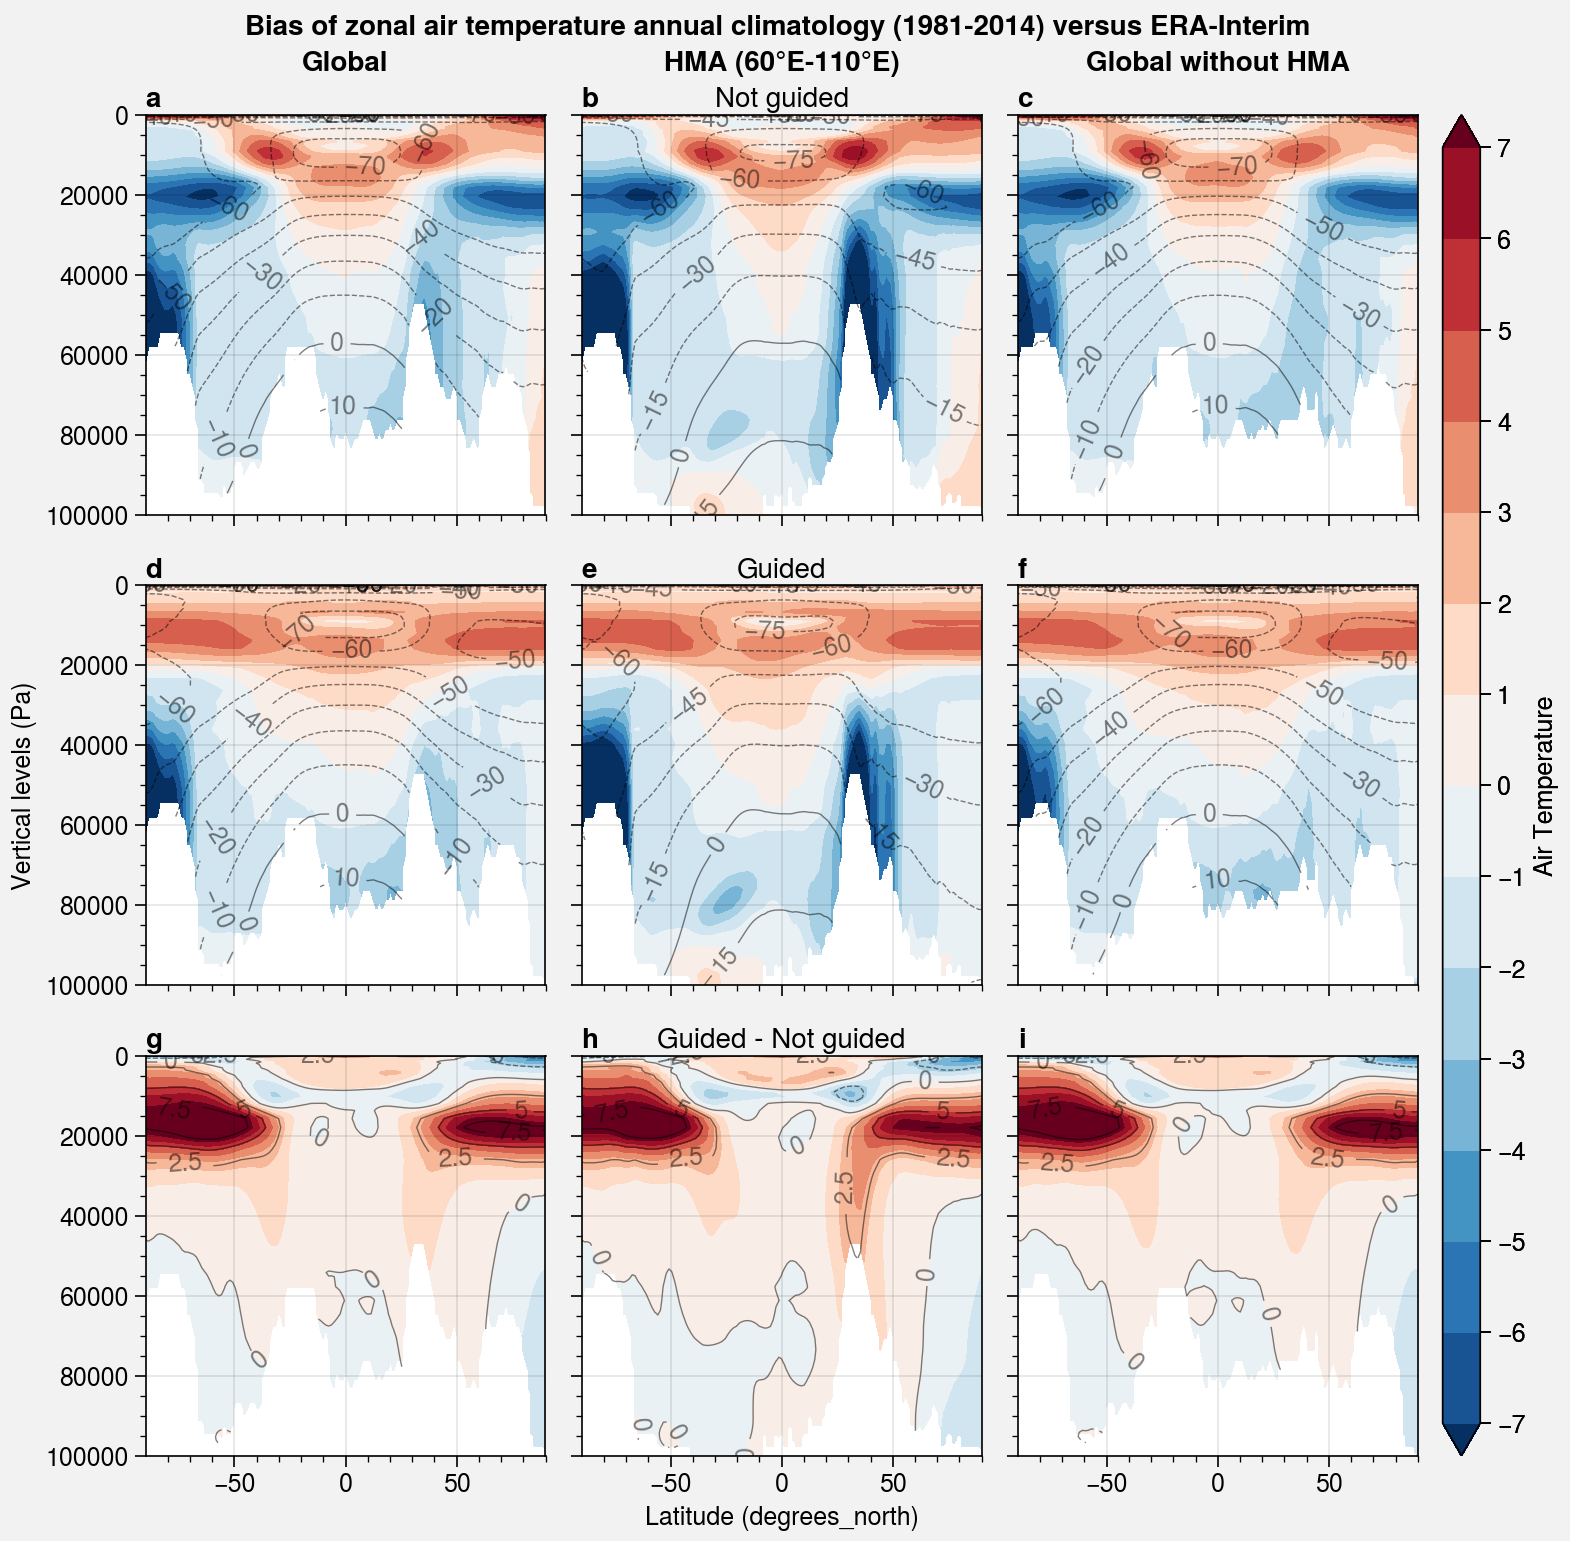

In [28]:
levels=plot.arange(-7,7,1)
extend='both'
cmap='BuRd'
ncols=3
lw=0.5
alpha=0.5
ylim=(100000,0)

f, axs = plot.subplots(ncols=ncols, nrows=3, axwidth=2)

list_models = ['Not guided', 'Guided', 'Guided - Not guided']

k=0
for i in range(0,3):
    # Model
    axs[k].contourf(bias_global[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1

    # ERA-Interim
    axs[k].contourf(bias_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title=list_models[i])
    k += 1

    # Bias
    m = axs[k].contourf(bias_global_without_HMA[i], cmap=cmap, levels=levels, extend=extend)
    axs[k].contour(clim_global_without_HMA[i], color='black', labels=True, lw=lw, alpha=alpha)
    axs[k].format(ylim=ylim, title='')
    k += 1
    
    
f.colorbar(m, label=label, loc='r')   


axs.format(
    suptitle="Bias of zonal air temperature annual climatology (1981-2014) versus ERA-Interim ",
    collabels=['Global', 'HMA (60°E-110°E)', 'Global without HMA'],
#     rowlabels=list_models,
    abc = True
)

f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.png')
f.save('img/'+var+'_zonal_CM6012-LR-amip-G-02_'+period.start+'-'+period.stop+'.pdf')

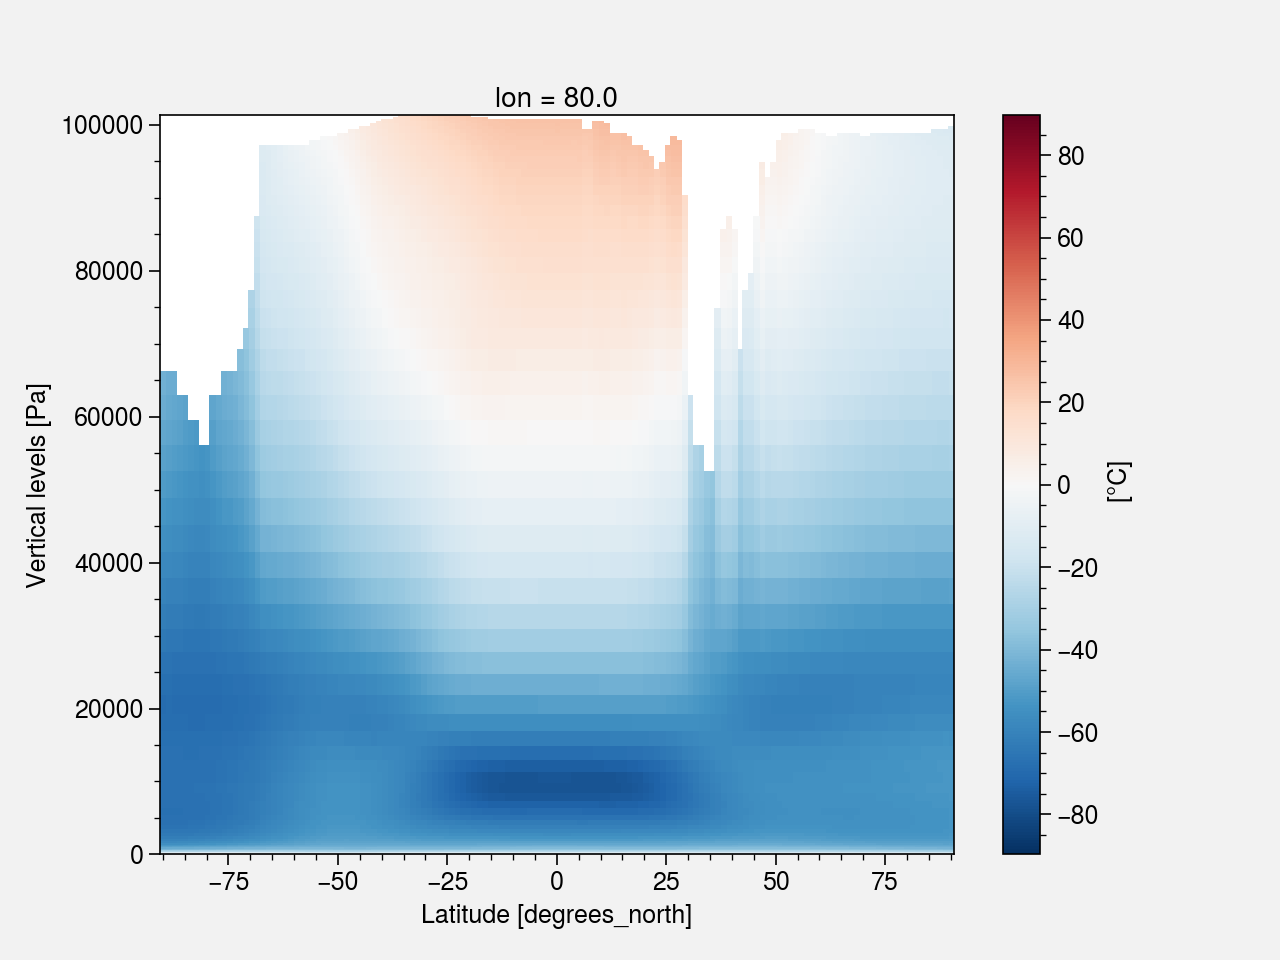

In [29]:
model_clim_masked.sel(lon=80).plot()